<a href="https://colab.research.google.com/github/josearangos/PDI/blob/Colab/Colab_Class/Esqueletizado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Skeletonization


In [0]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

In [3]:
! wget https://github.com/josearangos/PDI/raw/Colab/Resources/Image/sofsk.png

--2020-04-06 21:12:07--  https://github.com/josearangos/PDI/raw/Colab/Resources/Image/sofsk.png
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/josearangos/PDI/Colab/Resources/Image/sofsk.png [following]
--2020-04-06 21:12:08--  https://raw.githubusercontent.com/josearangos/PDI/Colab/Resources/Image/sofsk.png
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 713 [image/png]
Saving to: ‘sofsk.png’

sofsk.png           100%[===================>]     713  --.-KB/s    in 0s      

2020-04-06 21:12:08 (32.9 MB/s) - ‘sofsk.png’ saved [713/713]



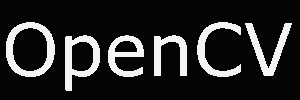

In [7]:
img = cv2.imread('sofsk.png',0)
cv2_imshow(img)

In [0]:
img = cv2.imread('sofsk.png',0)
size = np.size(img)
skel = np.zeros(img.shape,np.uint8)
 
ret,img = cv2.threshold(img,127,255,0) 
element = cv2.getStructuringElement(cv2.MORPH_CROSS,(3,3)) #Definimos el elemento estructural
done = False
 
while( not done):
    eroded = cv2.erode(img,element) #Realizamos erosion
    temp = cv2.dilate(eroded,element) #Realizamos dilatacion
    temp = cv2.subtract(img,temp) #restamos el erosion-dilatacion a la imagen original
    skel = cv2.bitwise_or(skel,temp)
    img = eroded.copy() #actualizamos la imagen
 
    zeros = size - cv2.countNonZero(img)
    if zeros==size:
        done = True

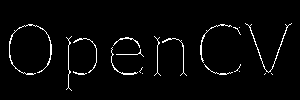

In [8]:
cv2_imshow(np.hstack([skel]))